In [84]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, 'scripts/')
from gen_matrix import matrix_gen, get_ICA
from get_sample import get_sample, create_strings_for_dataset
from fft import fft_for_sample
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
EEG = matrix_gen()
ICA = get_ICA()

class_ = 20000//3
class1 = [0,class_]
class2 = [class_,class_*2]
class3 = [class_*2, EEG.shape[1]]

print(class1, class2, class3)

[0, 6666] [6666, 13332] [13332, 19998]


In [3]:
#Перемножаем ICA и EEG матрицы
matrix = np.matmul(ICA, EEG)
#Разбиваем на матрицы классов, чтоб проще было делить на семплы
matrix_class1 = matrix[:,0:class_]
matrix_calss2 = matrix[:, class_:class_*2]
matrix_calss3 = matrix[:, class_*2:EEG.shape[1]]

In [4]:
#Получаю семплы для каждого класса
sample_calss1 = get_sample(matrix_class1)
sample_calss2 = get_sample(matrix_calss2)
sample_calss3 = get_sample(matrix_calss3)

In [5]:
print(len(sample_calss1), len(sample_calss2), len(sample_calss3))

34 34 34


In [6]:
#Преобразование Фурье
sample_calss1_fft = fft_for_sample(sample_calss1, first_n_elements=20)
sample_calss2_fft = fft_for_sample(sample_calss2, first_n_elements=20)
sample_calss3_fft = fft_for_sample(sample_calss3, first_n_elements=20)

In [7]:
#Создание строк для датасета, из матрицы 128*20 -> в вектор 2560
sample_calss1_fft_str = create_strings_for_dataset(sample_calss1_fft)
sample_calss2_fft_str = create_strings_for_dataset(sample_calss2_fft)
sample_calss3_fft_str = create_strings_for_dataset(sample_calss3_fft)

In [24]:
#Создание таблицы объекты-признаки

#Класс 1
data_class_1 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_1['label'] = 1

for i in tqdm(range(len(sample_calss1_fft_str))):
    data_class_1.loc[i, :-1] = sample_calss1_fft_str[i]
    
    
#Класс 2
data_class_2 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_2['label'] = 2

for i in tqdm(range(len(sample_calss2_fft_str))):
    data_class_2.loc[i, :-1] = sample_calss2_fft_str[i]
    
    
#Класс 3
data_class_3 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_3['label'] = 3

for i in tqdm(range(len(sample_calss3_fft_str))):
    data_class_3.loc[i, :-1] = sample_calss3_fft_str[i]
    
    
data = pd.concat([data_class_1, data_class_2, data_class_3], axis=0)
print(data.shape)
data.head(5)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))


(102, 2561)


,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,label
0,378.621793+0.000000j,392.359895+0.000000j,376.212969+0.000000j,407.818167+0.000000j,387.736533+0.000000j,399.956532+0.000000j,401.222270+0.000000j,394.667790+0.000000j,397.796120+0.000000j,401.077424+0.000000j,...,-0.239623-0.222756j,-0.286905-0.320460j,-0.357968-0.314217j,-0.215491-0.259454j,-0.341680-0.276433j,-0.305196-0.238052j,-0.308881-0.279752j,-0.341940-0.260021j,-0.235208-0.317992j,1
1,378.498136+0.000000j,392.292583+0.000000j,376.181943+0.000000j,407.746909+0.000000j,387.746698+0.000000j,399.882975+0.000000j,401.149658+0.000000j,394.616038+0.000000j,397.777711+0.000000j,401.057028+0.000000j,...,-0.520837-0.071549j,-0.612741-0.155405j,-0.633815-0.140458j,-0.542515-0.176187j,-0.635357-0.088674j,-0.575131-0.060048j,-0.596054-0.129106j,-0.617545-0.078515j,-0.515092-0.124903j,1
2,378.494679+0.000000j,392.321874+0.000000j,376.239557+0.000000j,407.815894+0.000000j,387.770623+0.000000j,399.915903+0.000000j,401.181507+0.000000j,394.723796+0.000000j,397.823791+0.000000j,401.101859+0.000000j,...,-0.472840+0.187818j,-0.537317+0.141913j,-0.575548+0.159495j,-0.538792+0.112142j,-0.508322+0.181164j,-0.476061+0.195841j,-0.551516+0.158773j,-0.463980+0.163623j,-0.432593+0.093382j,1
3,379.023669+0.000000j,392.874435+0.000000j,376.668883+0.000000j,408.260964+0.000000j,388.297122+0.000000j,400.346737+0.000000j,401.753792+0.000000j,395.208318+0.000000j,398.306172+0.000000j,401.608149+0.000000j,...,0.064540-0.036186j,0.019709-0.039423j,-0.007076-0.032071j,-0.066462-0.034094j,-0.025900-0.014831j,0.017568-0.016562j,0.035882-0.030549j,0.037953-0.053292j,0.015461-0.065619j,1
4,378.942847+0.000000j,392.705636+0.000000j,376.561026+0.000000j,408.035356+0.000000j,388.169465+0.000000j,400.223592+0.000000j,401.592606+0.000000j,395.093402+0.000000j,398.165688+0.000000j,401.492231+0.000000j,...,-0.150503-0.318108j,-0.173673-0.301851j,-0.145987-0.272791j,-0.186571-0.280399j,-0.153269-0.185514j,-0.123856-0.246385j,-0.160488-0.309019j,-0.164026-0.314761j,-0.135274-0.287606j,1


In [75]:
PCA = PCA(n_components=60)
data_pca = PCA.fit_transform(abs(data).iloc[:, :-1])

In [76]:
data_pca = pd.DataFrame(data_pca)
# data_pca['label'] = data['label'].values
labels = data['label'].values

In [82]:
LDA = LDA()
LDA.fit(data_pca, labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [85]:
rf = RandomForestClassifier()
rf.fit(data_pca, labels)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

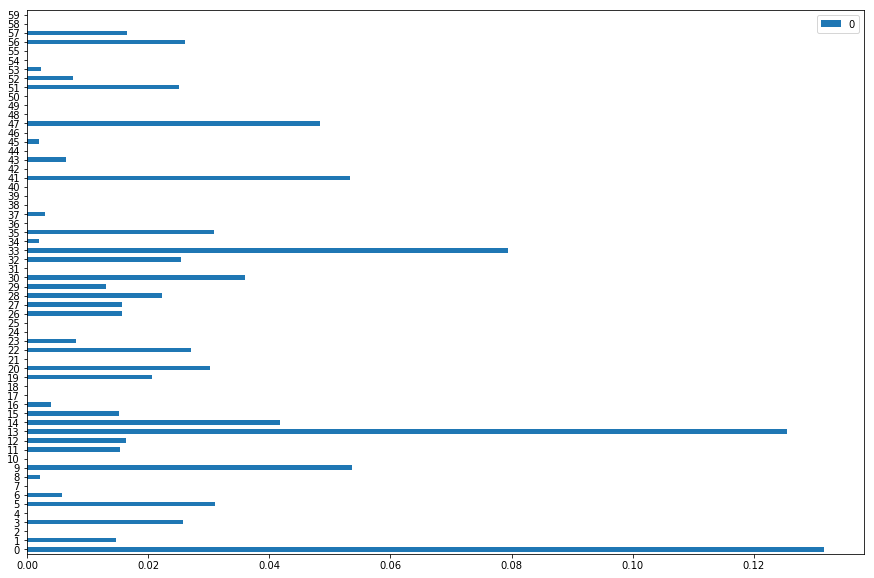

In [98]:
pd.DataFrame(rf.feature_importances_).plot(kind='barh', figsize=(15,10))

In [ ]:
def create_strings_for_dataset(samples_fft):
    strings = []
    for i in range(len(sample_calss1_fft)):
        new_string = []
        for n in range(sample_calss1_fft[i].shape[1]):
            new_string.extend(sample_calss1_fft[i][:,n])
        strings.append(new_string)
    
    return stringsi

In [27]:
strings = []
for i in range(len(sample_calss1_fft)):
    new_string = []
    for n in range(sample_calss1_fft[i].shape[1]):
        new_string.extend(sample_calss1_fft[i][:,n])
    strings.append(new_string)

In [30]:
strings[0]

[(389.26929293941447+0j),
 (396.5648172207328+0j),
 (415.69360645917595+0j),
 (397.30233665173324+0j),
 (396.4317563630926+0j),
 (395.77782063723805+0j),
 (389.87651796214595+0j),
 (395.965249471501+0j),
 (396.63463353847044+0j),
 (394.41740933359006+0j),
 (392.6530250084793+0j),
 (393.32040904113956+0j),
 (383.9468895893213+0j),
 (396.9414164494779+0j),
 (397.08060433738444+0j),
 (393.86010751394576+0j),
 (406.4841442533108+0j),
 (396.7988263636772+0j),
 (399.901463513526+0j),
 (399.5951884046249+0j),
 (401.69037701012996+0j),
 (394.4002381992076+0j),
 (401.53457266170966+0j),
 (395.4825874438102+0j),
 (391.70564348484936+0j),
 (393.11482186917493+0j),
 (383.7986954015363+0j),
 (386.22328446651267+0j),
 (407.47604827317315+0j),
 (389.8528010102788+0j),
 (394.45165547653704+0j),
 (398.9503255981533+0j),
 (392.877601435267+0j),
 (389.8725405173211+0j),
 (399.81966694831476+0j),
 (396.7381594958325+0j),
 (398.5510570901024+0j),
 (398.71905093713696+0j),
 (397.4302358640529+0j),
 (388.526

In [7]:
len(sample_calss1_fft)

34

In [18]:
sample_calss1_fft[0].shape

(128, 20)

In [21]:
a = []
a.extend(sample_calss1_fft[0][:,0])

In [22]:
a.extend(sample_calss1_fft[0][:,1])

In [26]:
sample_calss1_fft[0].shape

(128, 20)

In [7]:
sam[0]

(128, 150)

In [8]:
sample_calss1[0].shape

(128, 150)

In [7]:
(sample_calss1[0][1, :])

150

In [ ]:
#Преобразование Фурье
for samples in [sample_class1, sample_calss2, sample_calss3]:
    for sample in samples:
        
        
        for s in range(sample.shape[0]):
            

In [16]:


sample_class_fft = []

for sample in sample_calss1:
    new_sample = 0
    for idx, s in enumerate(range(sample.shape[0])):
        if idx == 0:
            new_sample = np.fft.fft(sample[s])
        else:
            new_sample = np.vstack((new_sample, np.fft.fft(sample[s])))
            
    sample_class_fft.append(new_sample)

[[ 1.10512951e+02+0.j          1.77324437e-01-0.10141406j
  -3.17981185e-02+0.08551106j ...  1.31112671e-01-0.13128963j
  -3.17981185e-02-0.08551106j  1.77324437e-01+0.10141406j]
 [ 1.08014025e+02+0.j          1.28715633e-01-0.08093709j
  -2.48077217e-02+0.0761321j  ...  4.48112231e-02-0.15252981j
  -2.48077217e-02-0.0761321j   1.28715633e-01+0.08093709j]
 [ 1.08327572e+02+0.j          1.17143495e-01-0.08971856j
  -5.86571574e-02+0.09391493j ...  8.38152142e-02-0.11110538j
  -5.86571574e-02-0.09391493j  1.17143495e-01+0.08971856j]
 ...
 [ 1.07693346e+02+0.j          1.20745245e-01-0.073073j
  -4.84656055e-02+0.08906934j ...  5.09541138e-02-0.12386247j
  -4.84656055e-02-0.08906934j  1.20745245e-01+0.073073j  ]
 [ 1.10223812e+02+0.j          1.42489287e-01-0.09029035j
  -6.06196373e-02+0.1105941j  ...  6.78973878e-02-0.10926802j
  -6.06196373e-02-0.1105941j   1.42489287e-01+0.09029035j]
 [ 1.09414262e+02+0.j          1.31052841e-01-0.1040995j
  -5.28246131e-02+0.11151837j ...  1.37455673

[[1.10575836e+02+0.j         5.31054879e-02-0.06386313j
  1.50897074e-01+0.12829283j ... 3.00953225e-01-0.12816727j
  1.50897074e-01-0.12829283j 5.31054879e-02+0.06386313j]
 [1.07988081e+02+0.j         2.85484987e-02-0.07594683j
  1.59244429e-01+0.14084853j ... 3.36563414e-01-0.09798292j
  1.59244429e-01-0.14084853j 2.85484987e-02+0.07594683j]
 [1.08281056e+02+0.j         5.24287490e-02-0.05695868j
  1.67534588e-01+0.08029535j ... 3.06444401e-01-0.07402859j
  1.67534588e-01-0.08029535j 5.24287490e-02+0.05695868j]
 ...
 [1.07757665e+02+0.j         9.92312761e-03-0.03178386j
  1.52364621e-01+0.16240189j ... 3.05409747e-01-0.13189071j
  1.52364621e-01-0.16240189j 9.92312761e-03+0.03178386j]
 [1.10234282e+02+0.j         1.58400383e-03-0.07420962j
  1.68722191e-01+0.12540188j ... 3.38251017e-01-0.13776788j
  1.68722191e-01-0.12540188j 1.58400383e-03+0.07420962j]
 [1.09415111e+02+0.j         3.90134524e-02-0.07880994j
  1.84718847e-01+0.14001271j ... 3.02224551e-01-0.07386096j
  1.84718847e-

[[ 1.10306590e+02+0.j         -2.07119745e-03+0.00418268j
   1.29421117e-01+0.13415581j ... -1.68821675e-02-0.11957093j
   1.29421117e-01-0.13415581j -2.07119745e-03-0.00418268j]
 [ 1.07762457e+02+0.j         -1.97288372e-02-0.01810852j
   1.37234608e-01+0.16294401j ... -3.74677962e-03-0.13603932j
   1.37234608e-01-0.16294401j -1.97288372e-02+0.01810852j]
 [ 1.08060155e+02+0.j         -2.08541366e-02+0.02027575j
   1.07411713e-01+0.12808725j ...  2.88904198e-03-0.16285747j
   1.07411713e-01-0.12808725j -2.08541366e-02-0.02027575j]
 ...
 [ 1.07455821e+02+0.j          1.97730321e-02-0.02232189j
   1.28243546e-01+0.14799662j ... -1.36954040e-02-0.13111881j
   1.28243546e-01-0.14799662j  1.97730321e-02+0.02232189j]
 [ 1.09962394e+02+0.j         -5.05401777e-03-0.01184988j
   1.28126390e-01+0.15524312j ... -1.07641090e-02-0.15855843j
   1.28126390e-01-0.15524312j -5.05401777e-03+0.01184988j]
 [ 1.09150514e+02+0.j         -6.52538926e-03+0.02481645j
   1.49860477e-01+0.15057332j ...  8.36959

[[ 1.10152439e+02+0.j         -1.03665688e-01-0.05667154j
  -1.15260755e-01+0.02011001j ... -8.64722238e-02-0.0341679j
  -1.15260755e-01-0.02011001j -1.03665688e-01+0.05667154j]
 [ 1.07646815e+02+0.j         -1.05458189e-01-0.04436672j
  -1.14363798e-01+0.00140691j ... -1.02615611e-01-0.03154845j
  -1.14363798e-01-0.00140691j -1.05458189e-01+0.04436672j]
 [ 1.07923775e+02+0.j         -7.59040787e-02-0.01813354j
  -7.80120680e-02+0.0327479j  ... -1.13200798e-01-0.03823179j
  -7.80120680e-02-0.0327479j  -7.59040787e-02+0.01813354j]
 ...
 [ 1.07361347e+02+0.j         -8.58857507e-02+0.00782511j
  -1.07058524e-01+0.01071055j ... -9.55766488e-02-0.03418158j
  -1.07058524e-01-0.01071055j -8.58857507e-02-0.00782511j]
 [ 1.09806133e+02+0.j         -6.94243102e-02-0.01099529j
  -1.03770445e-01+0.07335729j ... -1.03908959e-01+0.0221742j
  -1.03770445e-01-0.07335729j -6.94243102e-02+0.01099529j]
 [ 1.08976609e+02+0.j         -3.68530889e-02-0.07050373j
  -4.78119623e-02+0.01362183j ... -1.0508650

[[ 1.10234535e+02+0.j         -1.75182019e-02-0.08467503j
  -2.96357931e-01-0.01557919j ...  4.62503458e-02+0.0776307j
  -2.96357931e-01+0.01557919j -1.75182019e-02+0.08467503j]
 [ 1.07741043e+02+0.j         -1.22425534e-02-0.10672361j
  -2.66185667e-01-0.0213166j  ...  3.94246117e-02+0.07644276j
  -2.66185667e-01+0.0213166j  -1.22425534e-02+0.10672361j]
 [ 1.07932066e+02+0.j         -1.90710598e-02-0.08341182j
  -2.51060578e-01-0.04670547j ...  5.74956500e-02+0.0917202j
  -2.51060578e-01+0.04670547j -1.90710598e-02+0.08341182j]
 ...
 [ 1.07393565e+02+0.j         -4.98974225e-02-0.1124344j
  -2.86187942e-01-0.03516278j ...  7.83676157e-02+0.0399746j
  -2.86187942e-01+0.03516278j -4.98974225e-02+0.1124344j ]
 [ 1.09891190e+02+0.j         -6.69611509e-03-0.08365557j
  -3.06741921e-01-0.03849095j ...  1.86755781e-02+0.06924549j
  -3.06741921e-01+0.03849095j -6.69611509e-03+0.08365557j]
 [ 1.09090234e+02+0.j         -3.87513400e-02-0.1011187j
  -2.61985900e-01+0.01022362j ...  2.78504395e-

[[ 1.10003770e+02+0.j          5.50263312e-02-0.17480044j
  -7.34193056e-02+0.3131307j  ... -1.03891406e-01+0.17274469j
  -7.34193056e-02-0.3131307j   5.50263312e-02+0.17480044j]
 [ 1.07547450e+02+0.j          3.26497332e-02-0.15548029j
  -1.02028650e-01+0.29436989j ... -7.94934722e-02+0.18919142j
  -1.02028650e-01-0.29436989j  3.26497332e-02+0.15548029j]
 [ 1.07791384e+02+0.j          4.49313621e-02-0.14112718j
  -2.69925879e-02+0.29404001j ... -8.45744956e-02+0.23019573j
  -2.69925879e-02-0.29404001j  4.49313621e-02+0.14112718j]
 ...
 [ 1.07278224e+02+0.j          2.41242666e-02-0.19289341j
  -5.43464228e-02+0.28082545j ... -5.45238882e-02+0.14530352j
  -5.43464228e-02-0.28082545j  2.41242666e-02+0.19289341j]
 [ 1.09764877e+02+0.j          5.31554441e-02-0.13934686j
  -5.71357982e-02+0.30227541j ... -3.47297962e-02+0.21940855j
  -5.71357982e-02-0.30227541j  5.31554441e-02+0.13934686j]
 [ 1.08881235e+02+0.j          3.52238524e-02-0.15938343j
  -6.33836309e-02+0.29632711j ... -8.02618

[[ 1.10579765e+02+0.j          5.72106826e-02+0.03016642j
   1.34657746e-02-0.01396851j ...  7.79842587e-02+0.02830889j
   1.34657746e-02+0.01396851j  5.72106826e-02-0.03016642j]
 [ 1.08035427e+02+0.j          6.73760093e-02+0.00989956j
   2.22954900e-02-0.01724743j ...  7.97447394e-02+0.00545241j
   2.22954900e-02+0.01724743j  6.73760093e-02-0.00989956j]
 [ 1.08384318e+02+0.j          1.62545496e-02+0.04558861j
   1.06303549e-02-0.00775878j ...  3.80546128e-02+0.00940586j
   1.06303549e-02+0.00775878j  1.62545496e-02-0.04558861j]
 ...
 [ 1.07793906e+02+0.j          2.57940743e-02+0.05711484j
   2.74581182e-02-0.01245168j ...  7.71321639e-02+0.03320287j
   2.74581182e-02+0.01245168j  2.57940743e-02-0.05711484j]
 [ 1.10233899e+02+0.j          4.32486823e-02+0.01447671j
   3.01814743e-02-0.0172257j  ...  3.75645199e-02+0.02794101j
   3.01814743e-02+0.0172257j   4.32486823e-02-0.01447671j]
 [ 1.09500103e+02+0.j          8.31017513e-02+0.03528055j
  -7.41030471e-03-0.03883807j ...  3.77731

[[ 1.10287957e+02+0.j         -4.34745509e-02+0.0329891j
   7.19102177e-03-0.05452559j ... -5.93479724e-04+0.06027898j
   7.19102177e-03+0.05452559j -4.34745509e-02-0.0329891j ]
 [ 1.07769785e+02+0.j          6.02324992e-03+0.08429793j
   3.10701456e-02-0.04680292j ... -6.25554850e-03+0.08012648j
   3.10701456e-02+0.04680292j  6.02324992e-03-0.08429793j]
 [ 1.07947822e+02+0.j         -2.10392711e-02+0.04291421j
   4.00276742e-03-0.04925225j ... -3.17023969e-02+0.09057336j
   4.00276742e-03+0.04925225j -2.10392711e-02-0.04291421j]
 ...
 [ 1.07480567e+02+0.j         -1.87363577e-02+0.04518166j
   9.28891305e-03-0.0698808j  ...  8.12736243e-03+0.05684326j
   9.28891305e-03+0.0698808j  -1.87363577e-02-0.04518166j]
 [ 1.09956824e+02+0.j         -1.50890392e-03+0.04477801j
   5.42860022e-02-0.05260237j ... -2.20360838e-02+0.07891048j
   5.42860022e-02+0.05260237j -1.50890392e-03-0.04477801j]
 [ 1.09104986e+02+0.j         -4.95281515e-02+0.04338069j
  -2.72016795e-02-0.03560971j ... -4.690338

[[1.10592151e+02+0.j         3.10484062e-02+0.08644591j
  1.15958537e-01-0.07300649j ... 1.04277740e-01+0.08398206j
  1.15958537e-01+0.07300649j 3.10484062e-02-0.08644591j]
 [1.08041319e+02+0.j         2.29040674e-02+0.08174781j
  1.11380230e-01-0.07033858j ... 1.18398534e-01+0.03673307j
  1.11380230e-01+0.07033858j 2.29040674e-02-0.08174781j]
 [1.08263521e+02+0.j         1.34361540e-02+0.14685351j
  1.48224884e-01-0.05755267j ... 1.28453849e-01+0.07637576j
  1.48224884e-01+0.05755267j 1.34361540e-02-0.14685351j]
 ...
 [1.07717349e+02+0.j         4.99077770e-02+0.08189909j
  6.90125462e-02-0.03950241j ... 5.64459881e-02+0.05225694j
  6.90125462e-02+0.03950241j 4.99077770e-02-0.08189909j]
 [1.10152633e+02+0.j         2.99651083e-02+0.09831611j
  8.48573898e-02-0.04322879j ... 6.15394646e-02+0.01504091j
  8.48573898e-02+0.04322879j 2.99651083e-02-0.09831611j]
 [1.09325189e+02+0.j         2.48713124e-02+0.07207304j
  7.99923897e-02-0.06945368j ... 9.89136790e-02+0.05497258j
  7.99923897e-

[[ 1.10411750e+02+0.j         -2.23351223e-02-0.08569789j
  -6.91738161e-02+0.1542961j  ...  1.24439753e-01-0.28872875j
  -6.91738161e-02-0.1542961j  -2.23351223e-02+0.08569789j]
 [ 1.07875451e+02+0.j         -3.08685216e-02-0.09684523j
  -5.88820602e-02+0.21144159j ...  1.74010896e-01-0.2555588j
  -5.88820602e-02-0.21144159j -3.08685216e-02+0.09684523j]
 [ 1.08183697e+02+0.j         -3.19201315e-02-0.10630191j
  -7.16028455e-02+0.19945825j ...  1.93900984e-01-0.28841208j
  -7.16028455e-02-0.19945825j -3.19201315e-02+0.10630191j]
 ...
 [ 1.07655071e+02+0.j         -4.11088091e-02-0.08714506j
  -1.00283156e-01+0.19295031j ...  1.67909264e-01-0.27467731j
  -1.00283156e-01-0.19295031j -4.11088091e-02+0.08714506j]
 [ 1.10024023e+02+0.j         -6.56264596e-02-0.09077312j
  -9.28108590e-02+0.21523468j ...  1.50630322e-01-0.2705439j
  -9.28108590e-02-0.21523468j -6.56264596e-02+0.09077312j]
 [ 1.09204414e+02+0.j         -2.21166112e-02-0.08056901j
  -6.13164353e-02+0.1854095j  ...  1.8154837

[[ 1.10432003e+02+0.j         -2.23713171e-01+0.07388345j
  -1.42536830e-01-0.12040607j ... -1.45690862e-01-0.01169764j
  -1.42536830e-01+0.12040607j -2.23713171e-01-0.07388345j]
 [ 1.07903943e+02+0.j         -1.58189661e-01+0.03622397j
  -1.28915991e-01-0.05940651j ... -1.46646166e-01-0.01917208j
  -1.28915991e-01+0.05940651j -1.58189661e-01-0.03622397j]
 [ 1.08121796e+02+0.j         -2.21615786e-01+0.12622264j
  -1.39426901e-01-0.11234489j ... -1.14611496e-01-0.02654643j
  -1.39426901e-01+0.11234489j -2.21615786e-01-0.12622264j]
 ...
 [ 1.07629726e+02+0.j         -1.81570528e-01+0.09604581j
  -9.25857650e-02-0.07644824j ... -9.20274320e-02-0.02092765j
  -9.25857650e-02+0.07644824j -1.81570528e-01-0.09604581j]
 [ 1.10078753e+02+0.j         -1.63940387e-01+0.062182j
  -1.28462064e-01-0.09371813j ... -1.19632469e-01-0.04951931j
  -1.28462064e-01+0.09371813j -1.63940387e-01-0.062182j  ]
 [ 1.09249478e+02+0.j         -2.01367492e-01+0.07654813j
  -1.70170924e-01-0.15826826j ... -1.3910229

In [20]:
(sample_class_fft[0]).shape

(128, 150)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


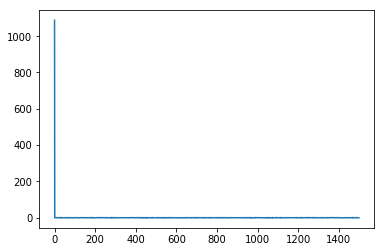

In [95]:
plt.plot(np.fft.fft(sample_calss1[0][1, :]))

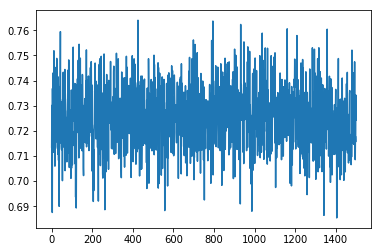

In [94]:
plt.plot(sample_calss1[0][1])

In [34]:
matrix_class1.shape

(128, 6666)

In [35]:
def get_sample(matrix, sample_size=1500):
    sample = []
    step = 500
    sample_size = 1500

    beg_sample = 0
    end_sample = 0

    for idx, i in (enumerate(range(0, matrix.shape[1], step))):

        if idx == 0: 
            sample.append(matrix[:, beg_sample:sample_size])
            beg_sample += step
            end_sample = sample_size + step
        else:
            sample.append(matrix[:, beg_sample:end_sample])
            beg_sample += step
            end_sample = beg_sample + sample_size
            
    return sample

In [36]:
s = get_sample(matrix_class1)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

0 1500
500 2000
1000 2500
1500 3000
2000 3500
2500 4000
3000 4500
3500 5000
4000 5500
4500 6000
5000 6500
5500 7000
6000 7500
6500 8000



In [37]:
s

[array([[0.71879543, 0.71792004, 0.71330593, ..., 0.70855395, 0.71793582,
         0.70314526],
        [0.71428297, 0.71187895, 0.71040675, ..., 0.702161  , 0.71639778,
         0.69927592],
        [0.70515806, 0.71004518, 0.69977361, ..., 0.69287193, 0.71149382,
         0.68754881],
        ...,
        [0.70327063, 0.70333904, 0.69667982, ..., 0.68905691, 0.7053709 ,
         0.68131441],
        [0.72481336, 0.72762929, 0.72206223, ..., 0.71409786, 0.73057818,
         0.70781843],
        [0.70811873, 0.7070639 , 0.70432493, ..., 0.69843045, 0.71085161,
         0.69151094]]),
 array([[0.69438574, 0.71756624, 0.72269504, ..., 0.70428745, 0.73495889,
         0.74137421],
        [0.69098289, 0.71750054, 0.71897778, ..., 0.70126294, 0.72647275,
         0.73591054],
        [0.68126772, 0.70472281, 0.7089419 , ..., 0.69306869, 0.72046459,
         0.72643062],
        ...,
        [0.67765258, 0.7017463 , 0.7069698 , ..., 0.68678775, 0.71502746,
         0.71478234],
        [0.7

In [39]:
matrix_class1[:, 6500:8000].shape

(128, 166)

In [26]:
for i in range(0, matrix.shape[1], step):
    print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500


In [16]:
sample = []
sample.append(matrix[:, 0:1500])

2

In [55]:
def matrix_gen(size=(128, 20000), classes=3):
    s, c = size
    matrix = np.zeros((s, 0))
    
    for cl in range(classes):
        one_class_size = c // classes
        m = np.random.uniform(10**-(cl+1), 20**-(cl+1), (s, one_class_size))
        matrix = np.hstack((matrix, m))
        
    return matrix      

In [57]:
pd.DataFrame(matrix_gen())

,0,1,2,3,4,5,6,7,8,9,...,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997
0,0.072034,0.057683,0.069000,0.057574,0.082612,0.060970,0.084941,0.053589,0.086606,0.098135,...,0.000284,0.000757,0.000284,0.000265,0.000376,0.000963,0.000156,0.000241,0.000719,0.000735
1,0.061280,0.070956,0.069136,0.060146,0.068093,0.053686,0.060887,0.098865,0.056404,0.051593,...,0.000782,0.000635,0.000923,0.000692,0.000278,0.000187,0.000161,0.000805,0.000820,0.000731
2,0.095317,0.084347,0.076558,0.089856,0.093193,0.097765,0.093824,0.063706,0.062693,0.089574,...,0.000671,0.000806,0.000894,0.000131,0.000409,0.000727,0.000544,0.000473,0.000693,0.000397
3,0.053705,0.072358,0.062753,0.067119,0.072473,0.067360,0.087455,0.074529,0.056365,0.082805,...,0.000733,0.000263,0.000230,0.000779,0.000965,0.000471,0.000267,0.000190,0.000223,0.000489
4,0.095714,0.097894,0.068519,0.078667,0.072875,0.078016,0.077018,0.092006,0.081230,0.077702,...,0.000683,0.000149,0.000800,0.000921,0.000396,0.000370,0.000175,0.000845,0.000608,0.000499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.093357,0.093147,0.059710,0.065332,0.077474,0.084629,0.079357,0.053942,0.057025,0.058197,...,0.000440,0.000324,0.000922,0.000270,0.000468,0.000297,0.000451,0.000241,0.000514,0.000149
124,0.098613,0.093819,0.081407,0.067352,0.079429,0.053262,0.081320,0.077138,0.070311,0.068345,...,0.000571,0.000726,0.000357,0.000661,0.000958,0.000359,0.000987,0.000343,0.000872,0.000405
125,0.091294,0.084011,0.086035,0.056553,0.069149,0.096204,0.085409,0.097277,0.056705,0.054778,...,0.000366,0.000567,0.000870,0.000804,0.000377,0.000269,0.000533,0.000492,0.000292,0.000261
126,0.087479,0.067073,0.055784,0.078576,0.065851,0.098610,0.097422,0.071585,0.051918,0.075107,...,0.000695,0.000137,0.000454,0.000991,0.000930,0.000636,0.000466,0.000487,0.000853,0.000154


In [54]:
np.hstack((np.zeros((128, 0)), np.random.uniform(10**-1, 20**-1, (128, 100))))

array([[0.07567899, 0.06920528, 0.05293663, ..., 0.05193939, 0.05387517,
        0.06626347],
       [0.07285147, 0.05154838, 0.08642388, ..., 0.05115275, 0.06087514,
        0.0902562 ],
       [0.09673487, 0.08955701, 0.08437122, ..., 0.07723483, 0.05736538,
        0.09314151],
       ...,
       [0.09318271, 0.08337373, 0.0755236 , ..., 0.08573309, 0.06939666,
        0.05716468],
       [0.09389456, 0.0873965 , 0.06595816, ..., 0.06290684, 0.07269216,
        0.05475264],
       [0.08130529, 0.06488729, 0.054046  , ..., 0.05472427, 0.07167495,
        0.08331904]])

In [42]:
pd.DataFrame(matrix_gen())

,0,1,2,3,4,5,6,7,8,9,...,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997
0,0.009578,0.004406,0.007706,0.004129,0.006086,0.004116,0.008442,0.004264,0.006773,0.003350,...,0.062437,0.086588,0.082289,0.089140,0.072837,0.063972,0.095117,0.095523,0.092763,0.054929
1,0.004276,0.008742,0.003421,0.002754,0.009052,0.009024,0.007123,0.002682,0.007106,0.006919,...,0.084881,0.055390,0.085272,0.087933,0.055766,0.098432,0.051527,0.056750,0.050289,0.070861
2,0.006487,0.007836,0.007594,0.004248,0.007970,0.005432,0.009471,0.003978,0.008607,0.003767,...,0.071338,0.073179,0.064545,0.051875,0.062045,0.089433,0.098004,0.078792,0.063131,0.067406
3,0.005901,0.005200,0.003430,0.006989,0.004679,0.009424,0.004369,0.007512,0.007044,0.005197,...,0.058519,0.072827,0.055134,0.075219,0.082218,0.060965,0.078464,0.069180,0.054841,0.081997
4,0.003296,0.002652,0.005517,0.006421,0.003884,0.008310,0.004918,0.007495,0.003637,0.006360,...,0.069791,0.086341,0.068771,0.068378,0.076113,0.085704,0.062127,0.099935,0.056002,0.072043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.005450,0.007826,0.002756,0.009894,0.002767,0.003855,0.008770,0.008549,0.009276,0.003794,...,0.078494,0.064526,0.076205,0.066654,0.082807,0.065004,0.067064,0.094095,0.086001,0.066059
124,0.007412,0.009449,0.009730,0.008943,0.009196,0.005838,0.002817,0.004907,0.003281,0.004911,...,0.090470,0.057806,0.055692,0.052249,0.083008,0.097173,0.099319,0.079140,0.087598,0.062616
125,0.008500,0.007713,0.009971,0.008315,0.004955,0.007674,0.006220,0.006901,0.007108,0.002711,...,0.080436,0.096636,0.080978,0.071982,0.055036,0.090799,0.096060,0.074938,0.087485,0.064866
126,0.009308,0.004132,0.004217,0.002947,0.009092,0.009868,0.006568,0.004374,0.002657,0.005877,...,0.082878,0.057060,0.094689,0.066091,0.090891,0.053331,0.090610,0.065225,0.075848,0.066061


In [35]:
np.random.uniform(10**-5, 10**-4)

1.629077275452666e-05

In [38]:
np.random.uniform(10**-1, 20**-1, (10,10))

array([[0.08239707, 0.09186126, 0.08324829, 0.06029782, 0.07888048,
        0.05680581, 0.05919602, 0.05582731, 0.05455531, 0.07261539],
       [0.0651572 , 0.09552953, 0.05682207, 0.06809143, 0.088062  ,
        0.08574377, 0.05507894, 0.06245436, 0.06294817, 0.07637262],
       [0.08069802, 0.09576982, 0.07393601, 0.09647975, 0.09049103,
        0.09563856, 0.06963172, 0.0509555 , 0.08586881, 0.05228037],
       [0.05881997, 0.09930483, 0.08088696, 0.06951051, 0.06465026,
        0.09481632, 0.08909057, 0.08313002, 0.05244132, 0.06120352],
       [0.07669238, 0.07856594, 0.0860111 , 0.06775568, 0.0718335 ,
        0.08589904, 0.06181285, 0.05368847, 0.09577925, 0.07186956],
       [0.09348075, 0.07361127, 0.07676384, 0.05074096, 0.08002163,
        0.07164419, 0.06851276, 0.09354741, 0.05680978, 0.08274467],
       [0.07611564, 0.05024035, 0.07016383, 0.07373375, 0.07237416,
        0.06604201, 0.07453262, 0.06914663, 0.06812771, 0.07621273],
       [0.0888128 , 0.09890118, 0.0923493

In [26]:
(128//3) * 3

126